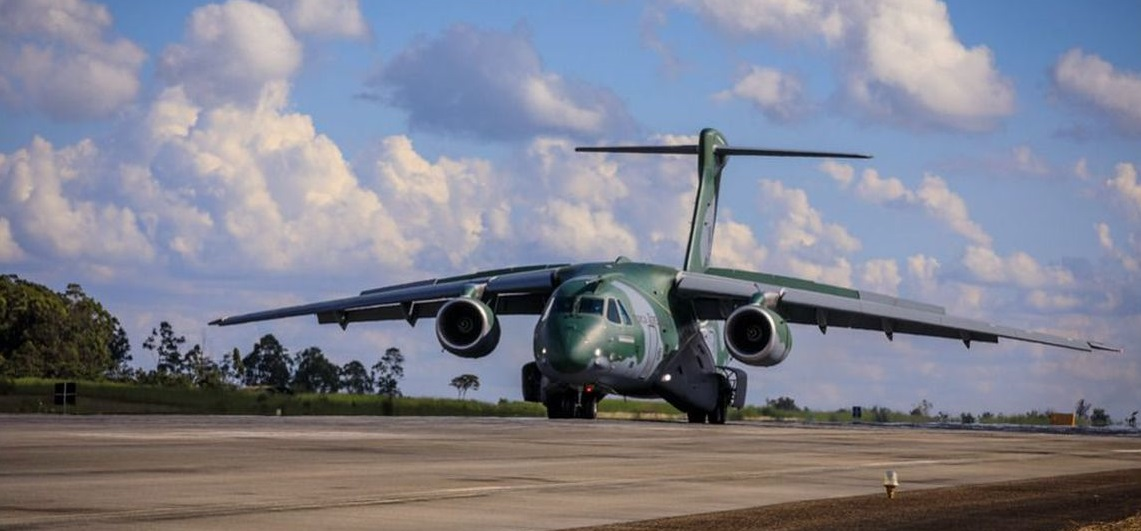

In [16]:
# Avião KC-390 Millennium, da Força Aérea Brasileira (FAB).

# Title

In [1]:
# Curso - DIO - Cognizant Cloud Data Engineer
# Fundamentos de ETL com Python

# Head

In [3]:
# Análise de dados utitlizando base da FAB
# CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira 
# https://www2.fab.mil.br/cenipa/index.php/ultimas-noticias/1157-cenipa-dados-abertos-sao-atualizados-em-setembro
# by geanclm in 05/03/2022 at 14:52h

# Local files

In [146]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\DIO - Cognizant Cloud Data Engineer\Python\Fundamentos de ETL com Python

13/03/2022  18:53    <DIR>          .
13/03/2022  18:53    <DIR>          ..
10/03/2022  15:35    <DIR>          .ipynb_checkpoints
13/03/2022  18:53           494.208 FAB_projeto_ETL.ipynb
10/03/2022  17:11           219.263 fundamentos.ipynb
10/03/2022  21:31    <DIR>          img
05/03/2022  15:47           788.905 ocorrencia.csv
11/03/2022  17:59           308.164 ocorrencia.ods
               4 arquivo(s)      1.810.540 bytes
               4 pasta(s)   613.594.972.160 bytes dispon¡veis


# Import libs

In [2]:
import pandas as pd
import pandera as pa

# Load dataset

In [3]:
# fonte: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira
valores_ausentes =['***','****','*****','###!','####','NULL']
df = pd.read_csv('ocorrencia.csv', sep=';', encoding='utf-8',
                 parse_dates=['ocorrencia_dia'], dayfirst=True,
                 usecols=[0,2,5,8,9,11,12,13,19],
                 na_values=valores_ausentes)

In [41]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia2', 'ocorrencia_classificacao',
       'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'total_recomendacoes'],
      dtype='object')

# Data validation

In [94]:
# 1 - verificar formato correto do atributo date

# 2 - importante pesquisar sobre expressão regular
# https://blog.dp6.com.br/express%C3%B5es-regulares-a-z-como-elas-podem-melhorar-a-sua-vida-a2700cef6f15

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   codigo_ocorrencia         5167 non-null   int64         
 1   codigo_ocorrencia2        5167 non-null   int64         
 2   ocorrencia_classificacao  5167 non-null   object        
 3   ocorrencia_cidade         5167 non-null   object        
 4   ocorrencia_uf             5165 non-null   object        
 5   ocorrencia_aerodromo      3262 non-null   object        
 6   ocorrencia_dia            5167 non-null   datetime64[ns]
 7   ocorrencia_hora           5166 non-null   object        
 8   total_recomendacoes       5167 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 363.4+ KB


In [68]:
# df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format ='%d/%m/%Y')
# df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format ='%H:%M:%S')
# df['ocorrencia_hora'] = df['ocorrencia_hora'].dt.strftime('%H:%M:%S')

In [7]:
df.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5162,80458,80458,ACIDENTE,JATAÍ,GO,NaN,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,NaN,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0
5166,80467,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0


In [31]:
# validação do tipo de dados de cada coluna
schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int, required=True),
        'ocorrencia_uf':pa.Column(pa.String, pa.Check.str_length(2,3), nullable=True),
        'ocorrencia_aerodromo':pa.Column(pa.String, nullable=True),
        'ocorrencia_hora':pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True)
        }
)

In [32]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,NaN,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,NaN,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,NaN,2012-01-06,16:30:00,0
...,...,...,...,...,...,...,...,...,...
5162,80458,80458,ACIDENTE,JATAÍ,GO,NaN,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,NaN,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


In [26]:
# df[df['ocorrencia_uf']=='***']
df.loc[4728]

codigo_ocorrencia                         79956
codigo_ocorrencia2                        79956
ocorrencia_classificacao               ACIDENTE
ocorrencia_cidade              NÃO IDENTIFICADA
ocorrencia_uf                               NaN
ocorrencia_aerodromo                        NaN
ocorrencia_dia              2021-02-26 00:00:00
ocorrencia_hora                        11:00:00
total_recomendacoes                           0
Name: 4728, dtype: object

In [67]:
df[df.index==4728]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4728,79956,79956,ACIDENTE,NÃO IDENTIFICADA,***,*****,2021-02-26,11:00:00,0


In [91]:
# df[df.ocorrencia_dia.dt.year==2021]
# df[df.ocorrencia_dia.dt.month==2]

In [34]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,NaN,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,NaN,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,NaN,2012-01-06,16:30:00,0


# Limpeza de dados

In [5]:
# 1 - importante conversar com a área responsável na empresa sobre o que pode ser feito com
# os registros com dados ausentes

In [6]:
df.head(5)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,0


In [9]:
df.loc[1,'ocorrencia_cidade']

'GUARULHOS'

In [16]:
df.loc[1:3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0


In [17]:
df.loc[[10,40]]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
10,45332,45332,ACIDENTE,VIAMÃO,RS,****,2012-01-09,13:30:00,0
40,45415,45415,ACIDENTE,RIO DE JANEIRO,RJ,****,2012-01-30,13:55:00,0


In [20]:
df.loc[:,'ocorrencia_cidade']

0        PORTO ALEGRE
1           GUARULHOS
2              VIAMÃO
3       SÃO SEBASTIÃO
4            SÃO SEPÉ
            ...      
5162            JATAÍ
5163          MARACAÍ
5164    NOVO HAMBURGO
5165         CURITIBA
5166        PETROLINA
Name: ocorrencia_cidade, Length: 5167, dtype: object

# Manipulações com o Dataframe

In [22]:
df.codigo_ocorrencia.is_unique

True

In [24]:
# definir coluna como índice do dataframe
# df.set_index('codigo_ocorrencia', inplace=True)

In [26]:
df

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
codigo_ocorrencia,,,,,,,,
52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,0
45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0
45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,0
...,...,...,...,...,...,...,...,...
80458,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
80452,80452,ACIDENTE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0


In [29]:
df.loc[80467]

codigo_ocorrencia2                        80467
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade                     PETROLINA
ocorrencia_uf                                PE
ocorrencia_aerodromo                       SBPL
ocorrencia_dia              2021-12-31 00:00:00
ocorrencia_hora                        20:30:00
total_recomendacoes                           0
Name: 80467, dtype: object

In [31]:
# df.reset_index(drop=True, inplace=True)

In [34]:
df.tail()

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5162,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
5163,80452,ACIDENTE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
5164,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0
5166,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0


In [35]:
# alterando o dado de um campo específico
# df.loc[0,'ocorrencia_aerodromo'] = ''

In [38]:
df.head(1)

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,INCIDENTE,PORTO ALEGRE,RS,,2012-01-05,20:27:00,0


In [39]:
# df.loc[df.ocorrencia_uf == 'SP', ['ocorrencia_classificacao']] = 'GRAVE'

In [40]:
df.tail()

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5162,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
5163,80452,GRAVE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
5164,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0
5166,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0


In [42]:
df[df['ocorrencia_uf'] == 'SP']

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1,45331,GRAVE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
3,45401,GRAVE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0
5,52243,GRAVE,UBATUBA,SP,****,2012-01-06,14:30:00,0
6,50713,GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
13,45408,GRAVE,ELDORADO,SP,****,2012-01-11,13:45:00,1
...,...,...,...,...,...,...,...,...
5148,80441,GRAVE,BRAGANÇA PAULISTA,SP,SDVH,2021-12-20,18:15:00,0
5157,80453,GRAVE,CAMPINAS,SP,SBKP,2021-12-29,09:00:00,0
5158,80454,GRAVE,ARAÇATUBA,SP,SBAU,2021-12-29,21:35:00,0
5161,80456,GRAVE,SÃO PAULO,SP,SBSP,2021-12-30,13:15:00,0


In [44]:
# Retomando o Dataset original da leitura com pd.read_csv

In [57]:
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,VAZIO,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,VAZIO,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,VAZIO,2012-01-06,16:30:00,0
...,...,...,...,...,...,...,...,...,...
5162,80458,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


# Limpeza de dados

In [48]:
#     ocorrencia_uf
#     ***

#     ocorrencia_aerodromo
#     ****
#     *****
#     ###!
#     ####

#     ocorrencia_hora
#     ****
#     *****
#     NULL

In [61]:
# df.loc[df.ocorrencia_aerodromo == '****',['ocorrencia_aerodromo']] = '<NA>'

In [63]:
# alterando dados em todo o Dataframe
# é possível carregar essa função na leitura dos dados
# df.replace(['***','****','*****','###!','####','NULL'],pd.NA, inplace=True)

In [66]:
df.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5162,80458,80458,ACIDENTE,JATAÍ,GO,<NA>,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,<NA>,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0
5166,80467,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0


In [35]:
# contando o número de dados ausentes no dataframe
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  2
ocorrencia_aerodromo        1905
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [90]:
df.isnull().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  2
ocorrencia_aerodromo        1905
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [38]:
df[df.ocorrencia_uf.isnull()]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1099,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,NaN,2013-09-02,02:54:00,0
4728,79956,79956,ACIDENTE,NÃO IDENTIFICADA,NaN,NaN,2021-02-26,11:00:00,0


In [73]:
# preencher os valores nulos com o número 0
# df.fillna(0, inplace=True)

In [74]:
# criar uma coluna no dataframe
# df['bkp'] = df['ocorrencia_uf']

In [78]:
# remover coluna do dataframe
# df.drop(['bkp'], axis=1, inplace=True)

In [80]:
df.dropna()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
6,50713,50713,INCIDENTE GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
7,45334,45334,INCIDENTE,BELÉM,PA,SBBE,2012-01-08,19:12:00,0
9,52244,52244,INCIDENTE,UBERLÂNDIA,MG,SBUL,2012-01-08,22:13:00,0
...,...,...,...,...,...,...,...,...,...
5160,80451,80451,INCIDENTE,MANAUS,AM,SBEG,2021-12-30,14:41:00,0
5161,80456,80456,INCIDENTE,SÃO PAULO,SP,SBSP,2021-12-30,13:15:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


In [81]:
df.shape

(5167, 9)

In [82]:
# excluir registro com pelo menos um valor ausente na coluna selecionada
df.dropna(subset=['ocorrencia_hora'])

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,<NA>,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,<NA>,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,<NA>,2012-01-06,16:30:00,0
...,...,...,...,...,...,...,...,...,...
5162,80458,80458,ACIDENTE,JATAÍ,GO,<NA>,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,<NA>,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


In [83]:
# df.drop_duplicates()

# Transformação

In [39]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [40]:
df.loc[1]

codigo_ocorrencia                         45331
codigo_ocorrencia2                        45331
ocorrencia_classificacao               ACIDENTE
ocorrencia_cidade                     GUARULHOS
ocorrencia_uf                                SP
ocorrencia_aerodromo                       SBGR
ocorrencia_dia              2012-01-06 00:00:00
ocorrencia_hora                        13:44:00
total_recomendacoes                           3
Name: 1, dtype: object

In [42]:
df.iloc[-1]

codigo_ocorrencia                         80467
codigo_ocorrencia2                        80467
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade                     PETROLINA
ocorrencia_uf                                PE
ocorrencia_aerodromo                       SBPL
ocorrencia_dia              2021-12-31 00:00:00
ocorrencia_hora                        20:30:00
total_recomendacoes                           0
Name: 5166, dtype: object

In [44]:
df.loc[10:15]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
10,45332,45332,ACIDENTE,VIAMÃO,RS,NaN,2012-01-09,13:30:00,0
11,52245,52245,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-09,13:36:00,0
12,45396,45396,INCIDENTE GRAVE,MARABÁ,PA,SBMA,2012-01-11,11:21:00,0
13,45408,45408,ACIDENTE,ELDORADO,SP,NaN,2012-01-11,13:45:00,1
14,45447,45447,INCIDENTE,RIO BRANCO,AC,NaN,2012-01-13,18:15:00,0
15,45409,45409,ACIDENTE,CÁCERES,MT,NaN,2012-01-14,10:00:00,0


In [43]:
df.iloc[10:15]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
10,45332,45332,ACIDENTE,VIAMÃO,RS,NaN,2012-01-09,13:30:00,0
11,52245,52245,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-09,13:36:00,0
12,45396,45396,INCIDENTE GRAVE,MARABÁ,PA,SBMA,2012-01-11,11:21:00,0
13,45408,45408,ACIDENTE,ELDORADO,SP,NaN,2012-01-11,13:45:00,1
14,45447,45447,INCIDENTE,RIO BRANCO,AC,NaN,2012-01-13,18:15:00,0


In [60]:
df.loc[0:5,'ocorrencia_uf']

0    RS
1    SP
2    RS
3    SP
4    RS
5    SP
Name: ocorrencia_uf, dtype: object

In [58]:
df['ocorrencia_uf'].head(6)

0    RS
1    SP
2    RS
3    SP
4    RS
5    SP
Name: ocorrencia_uf, dtype: object

In [62]:
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  2
ocorrencia_aerodromo        1905
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [65]:
df.loc[df.ocorrencia_uf.isnull()]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2,45333,45333,ACIDENTE,VIAMÃO,RS,NaN,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,NaN,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,NaN,2012-01-06,16:30:00,0
5,52243,52243,INCIDENTE,UBATUBA,SP,NaN,2012-01-06,14:30:00,0
8,45391,45391,ACIDENTE,CONCEIÇÃO DAS ALAGOAS,MG,NaN,2012-01-08,16:00:00,0
...,...,...,...,...,...,...,...,...,...
5151,80446,80446,ACIDENTE,JACAREACANGA,PA,NaN,2021-12-20,17:10:00,0
5155,80450,80450,ACIDENTE,DOURADOS,MS,NaN,2021-12-28,10:30:00,0
5159,80455,80455,INCIDENTE GRAVE,SANTA RITA,PB,NaN,2021-12-29,18:50:00,0
5162,80458,80458,ACIDENTE,JATAÍ,GO,NaN,2021-12-30,20:30:00,0


In [67]:
df.loc[df.ocorrencia_aerodromo.isnull()]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2,45333,45333,ACIDENTE,VIAMÃO,RS,NaN,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,NaN,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,NaN,2012-01-06,16:30:00,0
5,52243,52243,INCIDENTE,UBATUBA,SP,NaN,2012-01-06,14:30:00,0
8,45391,45391,ACIDENTE,CONCEIÇÃO DAS ALAGOAS,MG,NaN,2012-01-08,16:00:00,0
...,...,...,...,...,...,...,...,...,...
5151,80446,80446,ACIDENTE,JACAREACANGA,PA,NaN,2021-12-20,17:10:00,0
5155,80450,80450,ACIDENTE,DOURADOS,MS,NaN,2021-12-28,10:30:00,0
5159,80455,80455,INCIDENTE GRAVE,SANTA RITA,PB,NaN,2021-12-29,18:50:00,0
5162,80458,80458,ACIDENTE,JATAÍ,GO,NaN,2021-12-30,20:30:00,0


In [68]:
df.loc[df.ocorrencia_hora.isnull()]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2974,78823,78823,INCIDENTE,CORUMBÁ,MS,NaN,2017-07-09,NaN,0


In [69]:
# a função count não considera os valores nulos
df.count()

codigo_ocorrencia           5167
codigo_ocorrencia2          5167
ocorrencia_classificacao    5167
ocorrencia_cidade           5167
ocorrencia_uf               5165
ocorrencia_aerodromo        3262
ocorrencia_dia              5167
ocorrencia_hora             5166
total_recomendacoes         5167
dtype: int64

In [6]:
# retornar as ocorrências com mais de dez recomendações
# df[df['total_recomendacoes']>10]
df.loc[df.total_recomendacoes>10]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
844,47938,47938,INCIDENTE,BRASÍLIA,DF,SBBR,2013-04-13,18:00:00,11
1669,52265,52265,ACIDENTE,SANTOS,SP,NaN,2014-08-13,13:03:00,13
2804,66432,66432,INCIDENTE GRAVE,VITÓRIA,ES,NaN,2017-02-21,11:47:00,12


In [11]:
# cidades com mais de 10 recmendações
df.loc[df['total_recomendacoes']>10,['ocorrencia_cidade','total_recomendacoes']]

,ocorrencia_cidade,total_recomendacoes
844,BRASÍLIA,11
1669,SANTOS,13
2804,VITÓRIA,12


In [14]:
# filtro das ocorrência com INCIDENTE GRAVE
df.loc[df['ocorrencia_classificacao']=='INCIDENTE GRAVE',['ocorrencia_classificacao','ocorrencia_cidade']]

,ocorrencia_classificacao,ocorrencia_cidade
6,INCIDENTE GRAVE,CAMPINAS
12,INCIDENTE GRAVE,MARABÁ
18,INCIDENTE GRAVE,CAMOCIM
19,INCIDENTE GRAVE,MUANÁ
24,INCIDENTE GRAVE,RONDONÓPOLIS
...,...,...
5139,INCIDENTE GRAVE,NOVA BANDEIRANTES
5146,INCIDENTE GRAVE,FORMOSO DO ARAGUAIA
5158,INCIDENTE GRAVE,ARAÇATUBA
5159,INCIDENTE GRAVE,SANTA RITA


In [25]:
# INCIDENTE GRAVE em SP
df.loc[(df['ocorrencia_uf'] == 'SP') & (df['ocorrencia_classificacao'] =='INCIDENTE GRAVE')]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
6,50713,50713,INCIDENTE GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
78,45598,45598,INCIDENTE GRAVE,BRAGANÇA PAULISTA,SP,SBBP,2012-02-20,14:10:00,0
86,45653,45653,INCIDENTE GRAVE,GUARULHOS,SP,SBGR,2012-02-24,20:04:00,0
91,45599,45599,INCIDENTE GRAVE,BRAGANÇA PAULISTA,SP,SBBP,2012-02-27,19:15:00,0
140,45651,45651,INCIDENTE GRAVE,ITU,SP,NaN,2012-03-24,20:45:00,1
...,...,...,...,...,...,...,...,...,...
4954,80200,80200,INCIDENTE GRAVE,BRAGANÇA PAULISTA,SP,SDVH,2021-07-25,12:25:00,0
4980,80238,80238,INCIDENTE GRAVE,VOTUPORANGA,SP,SDVG,2021-08-11,19:09:00,0
5003,80265,80265,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2021-08-31,16:50:00,0
5098,80382,80382,INCIDENTE GRAVE,PIRACICABA,SP,SDPW,2021-11-16,20:50:00,0


In [41]:
# INCIDENTE GRAVE ou INCIDENTE no estado de São Paulo
df[((df['ocorrencia_classificacao'] =='INCIDENTE GRAVE') |
  (df['ocorrencia_classificacao'] =='INCIDENTE')) & (df['ocorrencia_uf']=='SP')]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5,52243,52243,INCIDENTE,UBATUBA,SP,NaN,2012-01-06,14:30:00,0
6,50713,50713,INCIDENTE GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
28,52248,52248,INCIDENTE,SÃO PAULO,SP,SBMT,2012-01-21,11:15:00,0
35,52054,52054,INCIDENTE,SÃO PAULO,SP,SBMT,2012-01-25,23:00:00,0
36,52055,52055,INCIDENTE,RIBEIRÃO PRETO,SP,NaN,2012-01-25,09:30:00,0
...,...,...,...,...,...,...,...,...,...
5134,80425,80425,INCIDENTE,SÃO PAULO,SP,SBSP,2021-12-09,20:30:00,0
5143,80431,80431,INCIDENTE,SANTOS,SP,SBST,2021-12-15,12:30:00,0
5157,80453,80453,INCIDENTE,CAMPINAS,SP,SBKP,2021-12-29,09:00:00,0
5158,80454,80454,INCIDENTE GRAVE,ARAÇATUBA,SP,SBAU,2021-12-29,21:35:00,0


In [44]:
# INCIDENTE GRAVE ou INCIDENTE no estado de São Paulo
# isin
df[df['ocorrencia_classificacao'].isin(['INCIDENTE','INCIDENTE GRAVE']) &
   (df['ocorrencia_uf']=='SP')]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5,52243,52243,INCIDENTE,UBATUBA,SP,NaN,2012-01-06,14:30:00,0
6,50713,50713,INCIDENTE GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
28,52248,52248,INCIDENTE,SÃO PAULO,SP,SBMT,2012-01-21,11:15:00,0
35,52054,52054,INCIDENTE,SÃO PAULO,SP,SBMT,2012-01-25,23:00:00,0
36,52055,52055,INCIDENTE,RIBEIRÃO PRETO,SP,NaN,2012-01-25,09:30:00,0
...,...,...,...,...,...,...,...,...,...
5134,80425,80425,INCIDENTE,SÃO PAULO,SP,SBSP,2021-12-09,20:30:00,0
5143,80431,80431,INCIDENTE,SANTOS,SP,SBST,2021-12-15,12:30:00,0
5157,80453,80453,INCIDENTE,CAMPINAS,SP,SBKP,2021-12-29,09:00:00,0
5158,80454,80454,INCIDENTE GRAVE,ARAÇATUBA,SP,SBAU,2021-12-29,21:35:00,0


In [55]:
# ocoorência com cidades de nome iniciado com a letra 'C'
df[df['ocorrencia_cidade'].str[0] == 'C']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
6,50713,50713,INCIDENTE GRAVE,CAMPINAS,SP,SDAI,2012-01-07,18:15:00,0
8,45391,45391,ACIDENTE,CONCEIÇÃO DAS ALAGOAS,MG,NaN,2012-01-08,16:00:00,0
15,45409,45409,ACIDENTE,CÁCERES,MT,NaN,2012-01-14,10:00:00,0
18,50714,50714,INCIDENTE GRAVE,CAMOCIM,CE,SNWC,2012-01-17,18:25:00,0
22,45390,45390,ACIDENTE,CACHOEIRA DOURADA,GO,NaN,2012-01-20,21:00:00,0
...,...,...,...,...,...,...,...,...,...
5142,80434,80434,ACIDENTE,CARACOL,MS,NaN,2021-12-14,21:35:00,0
5144,80447,80447,INCIDENTE,CONFINS,MG,SBCF,2021-12-15,17:10:00,0
5150,80445,80445,ACIDENTE,CHUPINGUAIA,RO,NaN,2021-12-20,12:05:00,0
5157,80453,80453,INCIDENTE,CAMPINAS,SP,SBKP,2021-12-29,09:00:00,0


In [62]:
# ocoorência com cidades de nome terminado com a letra 'A'
df[df['ocorrencia_cidade'].str[-1] == 'A']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5,52243,52243,INCIDENTE,UBATUBA,SP,NaN,2012-01-06,14:30:00,0
9,52244,52244,INCIDENTE,UBERLÂNDIA,MG,SBUL,2012-01-08,22:13:00,0
17,52246,52246,INCIDENTE,BRASÍLIA,DF,SBBR,2012-01-16,16:47:00,0
21,45392,45392,ACIDENTE,BRASÍLIA,DF,NaN,2012-01-19,21:30:00,2
22,45390,45390,ACIDENTE,CACHOEIRA DOURADA,GO,NaN,2012-01-20,21:00:00,0
...,...,...,...,...,...,...,...,...,...
5152,80465,80465,INCIDENTE,VITÓRIA,ES,SBVT,2021-12-21,22:25:00,0
5158,80454,80454,INCIDENTE GRAVE,ARAÇATUBA,SP,SBAU,2021-12-29,21:35:00,0
5159,80455,80455,INCIDENTE GRAVE,SANTA RITA,PB,NaN,2021-12-29,18:50:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


In [66]:
# ocoorência com cidades de nome terminado com a letra 'MA'
df[df['ocorrencia_cidade'].str[-2:] == 'MA']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
249,45939,45939,ACIDENTE,UMUARAMA,PR,NaN,2012-05-30,19:00:00,0
273,46180,46180,ACIDENTE,AURIFLAMA,SP,NaN,2012-06-16,19:30:00,0
971,49113,49113,INCIDENTE GRAVE,NOVA LIMA,MG,NaN,2013-06-15,12:00:00,4
974,48799,48799,ACIDENTE,CANUTAMA,AM,NaN,2013-06-18,21:30:00,0
1518,80059,80059,INCIDENTE,IVINHEMA,MS,NaN,2014-04-27,11:30:00,0
1529,51347,51347,INCIDENTE,DIADEMA,SP,NaN,2014-05-04,16:00:00,0
1729,52340,52340,ACIDENTE,FAMA,MG,NaN,2014-09-20,15:00:00,1
1840,52832,52832,ACIDENTE,BURITAMA,SP,NaN,2014-12-14,23:40:00,0
1871,52979,52979,ACIDENTE,IVINHEMA,MS,NaN,2015-01-02,14:50:00,0
1914,52984,52984,ACIDENTE,NOVA LIMA,MG,SJLY,2015-02-01,15:10:00,0


In [69]:
# ocoorência com cidades onde o nome contem a sequência 'MA' ou AL
df[df['ocorrencia_cidade'].str.contains('MA|AL')]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
8,45391,45391,ACIDENTE,CONCEIÇÃO DAS ALAGOAS,MG,NaN,2012-01-08,16:00:00,0
11,52245,52245,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-09,13:36:00,0
94,45570,45570,ACIDENTE,LUIZ ALVES,SC,NaN,2012-02-29,11:15:00,0
121,45618,45618,ACIDENTE,LUIZ ALVES,SC,NaN,2012-03-12,17:00:00,1
...,...,...,...,...,...,...,...,...,...
5001,80269,80269,INCIDENTE,PORTO ALEGRE,RS,SBPA,2021-08-30,14:20:00,0
5005,80274,80274,INCIDENTE,PORTO ALEGRE,RS,SBPA,2021-09-01,02:20:00,0
5010,80272,80272,ACIDENTE,ALTO ALEGRE,RR,SJNC,2021-09-05,19:00:00,0
5099,80407,80407,INCIDENTE,PORTO ALEGRE,RS,SBPA,2021-11-16,22:10:00,0


In [82]:
# ocorrências do ano de 2015, mês de Dezembro e dia >= 3 e <= 8
df[(df['ocorrencia_dia'].dt.year == 2015) &
   (df['ocorrencia_dia'].dt.month == 12) &
    (df['ocorrencia_dia'].dt.day >= 3) &
     (df['ocorrencia_dia'].dt.day <= 8)]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2306,53575,53575,INCIDENTE,CAMPOS DOS GOYTACAZES,RJ,SBFS,2015-12-03,10:50:00,0
2307,60637,60637,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-12-03,16:47:00,0
2308,53625,53625,ACIDENTE,TRINDADE,GO,NaN,2015-12-06,13:10:00,3
2309,53626,53626,ACIDENTE,AMERICANA,SP,SDAI,2015-12-06,15:00:00,1
2310,53628,53628,ACIDENTE,AGUAÍ,SP,NaN,2015-12-08,14:30:00,1
2311,53629,53629,INCIDENTE GRAVE,JALES,SP,SDJL,2015-12-08,10:20:00,0
2312,53631,53631,INCIDENTE,CAMPINAS,SP,SBKP,2015-12-08,16:19:00,0
2313,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0


In [95]:
# juntar os campos da data e hora para facilitar as opções de consulta
df['dia_hora'] = pd.to_datetime(df['ocorrencia_dia'].astype(str) + " " + df['ocorrencia_hora'])

In [97]:
df.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
5162,80458,80458,ACIDENTE,JATAÍ,GO,NaN,2021-12-30,20:30:00,0,2021-12-30 20:30:00
5163,80452,80452,ACIDENTE,MARACAÍ,SP,NaN,2021-12-31,09:30:00,0,2021-12-31 09:30:00
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0,2021-12-31 11:59:00
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0,2021-12-31 15:12:00
5166,80467,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0,2021-12-31 20:30:00


In [98]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dia_hora                    datetime64[ns]
dtype: object

In [103]:
# ocorrências do ano de 2015,
# mês de Dezembro,
# dias entre 3 e 8
# e intervalo entre 11h e 13h
df[(df['dia_hora'].dt.year == 2015) &
    (df['dia_hora'].dt.month == 12) &
        (df['dia_hora'].dt.day >= 3) &
            (df['dia_hora'].dt.day <= 8) &
                (df['dia_hora'].dt.hour >= 11) &
                    (df['dia_hora'].dt.hour <= 13)]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
2308,53625,53625,ACIDENTE,TRINDADE,GO,NaN,2015-12-06,13:10:00,3,2015-12-06 13:10:00
2313,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0,2015-12-08 13:00:00


In [107]:
df.loc[(df['dia_hora'] >='2015-12-03 11:00:00') &
       (df['dia_hora'] <='2015-12-08 13:00:00')]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
2307,60637,60637,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-12-03,16:47:00,0,2015-12-03 16:47:00
2308,53625,53625,ACIDENTE,TRINDADE,GO,NaN,2015-12-06,13:10:00,3,2015-12-06 13:10:00
2309,53626,53626,ACIDENTE,AMERICANA,SP,SDAI,2015-12-06,15:00:00,1,2015-12-06 15:00:00
2311,53629,53629,INCIDENTE GRAVE,JALES,SP,SDJL,2015-12-08,10:20:00,0,2015-12-08 10:20:00
2313,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0,2015-12-08 13:00:00


In [115]:
# criar novo dataframe com dados selecionados do ano de 2015 e mês de Março
df_2015_03 = df.loc[(df['dia_hora'].dt.year == 2015) & (df['dia_hora'].dt.month == 3)]

In [117]:
df_2015_03.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
1992,53212,53212,INCIDENTE,JUNDIAÍ,SP,SBJD,2015-03-28,17:32:00,0,2015-03-28 17:32:00
1993,53213,53213,INCIDENTE,JUNDIAÍ,SP,SBJD,2015-03-28,15:51:00,0,2015-03-28 15:51:00
1994,53181,53181,ACIDENTE,COLÍDER,MT,NaN,2015-03-29,20:17:00,0,2015-03-29 20:17:00
1995,53187,53187,INCIDENTE,JOINVILLE,SC,SBJV,2015-03-29,18:36:00,0,2015-03-29 18:36:00
1996,53211,53211,INCIDENTE,BAURU,SP,SBBU,2015-03-30,19:40:00,0,2015-03-30 19:40:00


In [119]:
# Observação: a coluna ocorrencia_aerodromo apresenta dados ausentes
df_2015_03.count()

codigo_ocorrencia           37
codigo_ocorrencia2          37
ocorrencia_classificacao    37
ocorrencia_cidade           37
ocorrencia_uf               37
ocorrencia_aerodromo        21
ocorrencia_dia              37
ocorrencia_hora             37
total_recomendacoes         37
dia_hora                    37
dtype: int64

In [122]:
# Observação: a coluna ocorrencia_aerodromo apresenta dados ausentes
df_2015_03.groupby(['ocorrencia_classificacao','ocorrencia_uf','ocorrencia_cidade']).count()

codigo_ocorrencia  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                        
ACIDENTE                 AM            TABATINGA                            1   
                         CE            GUARACIABA DO NORTE                  1   
                         GO            CAIAPÔNIA                            1   
                         MA            SANTA LUZIA                          1   
                         MG            ARAGUARI                             1   
                         MS            CAMPO GRANDE                         1   
                         MT            CANARANA                             1   
                                       COLÍDER                              1   
                                       DIAMANTINO                           1   
                         PA            CHAVES                               1   
                         PB            PRINCESA ISABEL                      1   
                         PR            AMAPORÃ                              1   
                         SC            PORTO UNIÃO                          1   
                         SP            ARARAS                               1   
                                       MOGI GUAÇU                           1   
INCIDENTE                DF            BRASÍLIA                             1   
                         ES            SERRA                                1   
                         MG            CONFINS                              2   
                                       PARÁ DE MINAS                        1   
                         PA            BELÉM                                1   
                                       MARABÁ                               1   
                         PR            CURITIBA                             1   
                         RJ            RIO DE JANEIRO                       1   
                         RS            PORTO ALEGRE                         1   
                         SC            ITAPEMA                              1   
                                       JOINVILLE                            1   
                         SP            BAURU                                1   
                                       CAMPINAS                             1   
                                       JUNDIAÍ                              2   
                                       SOROCABA                             1   
INCIDENTE GRAVE          AM            MAUÉS                                1   
                         BA            RIACHÃO DAS NEVES                    1   
                                       SÃO DESIDÉRIO                        1   
                         RJ            MACAÉ                                1   
                                       RIO DE JANEIRO                       1   

                                                            codigo_ocorrencia2  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                         
ACIDENTE                 AM            TABATINGA                             1   
                         CE            GUARACIABA DO NORTE                   1   
                         GO            CAIAPÔNIA                             1   
                         MA            SANTA LUZIA                           1   
                         MG            ARAGUARI                              1   
                         MS            CAMPO GRANDE                          1   
                         MT            CANARANA                              1   
                                       COLÍDER                               1   
                                       DIAMANTINO                            1   
                         PA            CHAVES                                1   
                         PB            PRINCESA ISABEL                       1

In [126]:
# Observação: a coluna ocorrencia_aerodromo apresenta dados ausentes
# a opção size conta o número de registros de cada campo desconsiderando
# é uma alternativa para contar também onde consta dados ausentes
df_2015_03.groupby(['ocorrencia_classificacao',
                    'ocorrencia_uf',
                    'ocorrencia_cidade',
                   'ocorrencia_aerodromo']).size()

ocorrencia_classificacao  ocorrencia_uf  ocorrencia_cidade    ocorrencia_aerodromo
ACIDENTE                  AM             TABATINGA            SBTT                    1
                          CE             GUARACIABA DO NORTE  SWBE                    1
                          MS             CAMPO GRANDE         SSIE                    1
                          PA             CHAVES               SNXW                    1
                          SP             ARARAS               SDEH                    1
INCIDENTE                 MG             CONFINS              SBCF                    2
                                         PARÁ DE MINAS        SNPA                    1
                          PA             BELÉM                SBBE                    1
                                         MARABÁ               SBMA                    1
                          PR             CURITIBA             SBCT                    1
                          RJ         

In [129]:
# listar número de registros por 'ocorrencia_classificacao' em ordem decrescente
df_2015_03.groupby(['ocorrencia_classificacao']).size().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          17
ACIDENTE           15
INCIDENTE GRAVE     5
dtype: int64

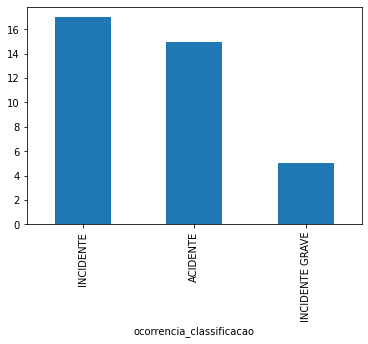

In [131]:
df_2015_03.groupby(['ocorrencia_classificacao']).size().sort_values(ascending=False).plot.bar();

In [141]:
# Ocorrências região Sudeste ano 2012
df_2012_Sudeste = df[(df['ocorrencia_uf'].isin(['SP','MG','ES','RJ'])) &
                     (df['dia_hora'].dt.year==2012)]

In [143]:
df_2012_Sudeste.groupby('ocorrencia_classificacao').size().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          188
ACIDENTE            85
INCIDENTE GRAVE     31
dtype: int64

In [147]:
df_2012_Sudeste.count()

codigo_ocorrencia           304
codigo_ocorrencia2          304
ocorrencia_classificacao    304
ocorrencia_cidade           304
ocorrencia_uf               304
ocorrencia_aerodromo        178
ocorrencia_dia              304
ocorrencia_hora             304
total_recomendacoes         304
dia_hora                    304
dtype: int64

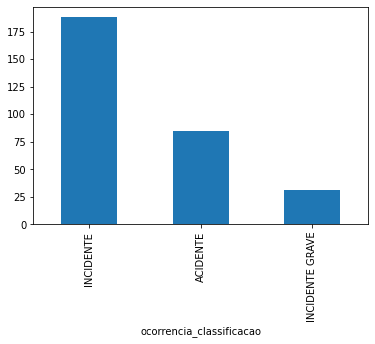

In [145]:
df_2012_Sudeste.groupby('ocorrencia_classificacao').size().sort_values(ascending=False).plot.bar();

In [149]:
df_2012_Sudeste.groupby(['ocorrencia_classificacao',
                         'ocorrencia_uf',
                         'ocorrencia_cidade']).count()

codigo_ocorrencia  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                      
ACIDENTE                 ES            VILA VELHA                         1   
                         MG            ALFENAS                            1   
                                       BELO HORIZONTE                     3   
                                       CAMPINA VERDE                      1   
                                       CAMPO FLORIDO                      1   
...                                                                     ...   
INCIDENTE GRAVE          SP            ITÁPOLIS                           1   
                                       JUNDIAÍ                            3   
                                       RIBEIRÃO PRETO                     1   
                                       SALTO DE PIRAPORA                  1   
                                       SÃO PAULO                          1   

                                                          codigo_ocorrencia2  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                       
ACIDENTE                 ES            VILA VELHA                          1   
                         MG            ALFENAS                             1   
                                       BELO HORIZONTE                      3   
                                       CAMPINA VERDE                       1   
                                       CAMPO FLORIDO                       1   
...                                                                      ...   
INCIDENTE GRAVE          SP            ITÁPOLIS                            1   
                                       JUNDIAÍ                             3   
                                       RIBEIRÃO PRETO                      1   
                                       SALTO DE PIRAPORA                   1   
                                       SÃO PAULO                           1   

                                                          ocorrencia_aerodromo  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                         
ACIDENTE                 ES            VILA VELHA                            0   
                         MG            ALFENAS                               0   
                                       BELO HORIZONTE                        2   
                                       CAMPINA VERDE                         0   
                                       CAMPO FLORIDO                         0   
...                                                                        ...   
INCIDENTE GRAVE          SP            ITÁPOLIS                              1   
                                       JUNDIAÍ                               3   
                                       RIBEIRÃO PRETO                        1   
                                       SALTO DE PIRAPORA                     1   
                                       SÃO PAULO                             0   

                                                          ocorrencia_dia  \
ocorrencia_classificacao ocorrencia_uf ocorrencia_cidade                   
ACIDENTE                 ES            VILA VELHA                      1   
                         MG            ALFENAS                         1   
                                       BELO HORIZONTE                  3   
                                       CAMPINA VERDE                   1   
                                       CAMPO FLORIDO                   1   
...                                                                  ...   
INCIDENTE GRAVE          SP            ITÁPOLIS                        1   
                                       JUNDIAÍ                         3   
                                       RIBEIRÃO PRETO                  1   
                                       SALTO DE PIRAPORA               1   
          

In [150]:
df_2012_Sudeste.groupby(['ocorrencia_classificacao',
                    'ocorrencia_uf',
                    'ocorrencia_cidade',
                   'ocorrencia_aerodromo']).size()

ocorrencia_classificacao  ocorrencia_uf  ocorrencia_cidade  ocorrencia_aerodromo
ACIDENTE                  MG             BELO HORIZONTE     SBPR                    2
                                         UBERLÂNDIA         SJPT                    1
                          RJ             ANGRA DOS REIS     SDMC                    1
                                         MACAÉ              SBME                    1
                                         MARICÁ             SDMC                    2
                                                                                   ..
INCIDENTE GRAVE           SP             GUARULHOS          SBGR                    1
                                         ITÁPOLIS           SDIO                    1
                                         JUNDIAÍ            SBJD                    3
                                         RIBEIRÃO PRETO     SBRP                    1
                                         SALTO DE PIRAPORA 

In [156]:
# total de recomendações para o Rio de Janeiro em 2012
df_2012_Sudeste.loc[df['ocorrencia_cidade']=='RIO DE JANEIRO'].total_recomendacoes.sum()

11

In [157]:
# cofirmando total_recomendacoes
df_2012_Sudeste.loc[(df['ocorrencia_cidade']=='RIO DE JANEIRO') &
                   (df['total_recomendacoes'] > 0)]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
30,45397,45397,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,NaN,2012-01-22,19:05:00,2,2012-01-22 19:05:00
60,45588,45588,ACIDENTE,RIO DE JANEIRO,RJ,NaN,2012-02-07,20:56:00,4,2012-02-07 20:56:00
339,46172,46172,ACIDENTE,RIO DE JANEIRO,RJ,NaN,2012-07-24,19:10:00,1,2012-07-24 19:10:00
381,46263,46263,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBJR,2012-08-17,15:15:00,3,2012-08-17 15:15:00
595,46706,46706,INCIDENTE,RIO DE JANEIRO,RJ,SBJR,2012-12-05,17:40:00,1,2012-12-05 17:40:00


In [169]:
# Número de recomendações por aerodromo
# Observação: a coluna ocorrencia_aerodromo apresenta dados ausentes
df_2012_Sudeste.groupby(['ocorrencia_aerodromo'], dropna=False).total_recomendacoes.sum()

ocorrencia_aerodromo
SBBH     0
SBBP     4
SBBU     0
SBBZ     0
SBCB     0
SBCF     0
SBCP     0
SBDN     0
SBGL     0
SBGR     4
SBGW     0
SBIP     0
SBJD     2
SBJF     0
SBJR     4
SBKP     0
SBME     0
SBMT     2
SBPC     0
SBPR     3
SBRJ     0
SBRP     0
SBSJ     0
SBSP     2
SBSR     0
SBUL     0
SBUR     0
SBVT     0
SDAA     0
SDAI     0
SDAM     1
SDBB     2
SDBK     0
SDBN     0
SDCD     3
SDCO     0
SDIO     0
SDMC     0
SDMV     0
SDPW     0
SDRK     0
SDTB     0
SDTF     0
SDVH     0
SILT     0
SJPT     0
SNHH     0
SNOF     0
SWXQ     0
NaN     48
Name: total_recomendacoes, dtype: int64

In [175]:
# Número de recomendações por cidade
# Somente cidades com recomendações
df_2012_Sudeste.loc[df_2012_Sudeste['total_recomendacoes'] >0 ].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=False)

ocorrencia_cidade
RIO DE JANEIRO           11
SÃO PAULO                 8
BOITUVA                   7
GUARULHOS                 4
BRAGANÇA PAULISTA         4
MACAÉ                     4
CATANDUVA                 3
JUQUIÁ                    3
GUARUJÁ                   3
BELO HORIZONTE            3
ITANHAÉM                  2
ESPINOSA                  2
ITÁPOLIS                  2
BEBEDOURO                 2
JUNDIAÍ                   2
LENÇÓIS PAULISTA          2
PARÁ DE MINAS             2
SANTA BÁRBARA D'OESTE     2
CAMPO FLORIDO             2
CAMPINAS                  1
TARUMIRIM                 1
DRACENA                   1
ELDORADO                  1
ITU                       1
JUIZ DE FORA              1
ANGRA DOS REIS            1
Name: total_recomendacoes, dtype: int64

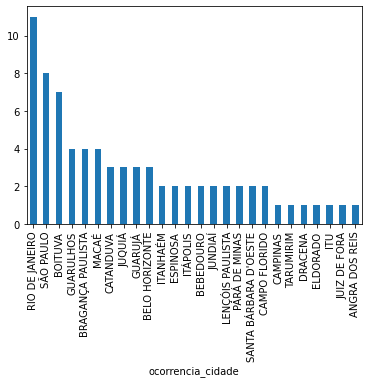

In [180]:
df_2012_Sudeste.loc[df_2012_Sudeste['total_recomendacoes'] >0 ].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=False).plot.bar();

In [182]:
# Total de recomendações por mês para cada cidade
df_2012_Sudeste.loc[df_2012_Sudeste['total_recomendacoes'] >0 ].groupby(['ocorrencia_cidade',
    df_2012_Sudeste.dia_hora.dt.month]).total_recomendacoes.sum()

ocorrencia_cidade      dia_hora
ANGRA DOS REIS         7           1
BEBEDOURO              7           2
BELO HORIZONTE         8           3
BOITUVA                7           7
BRAGANÇA PAULISTA      4           4
CAMPINAS               8           1
CAMPO FLORIDO          2           2
CATANDUVA              10          3
DRACENA                5           1
ELDORADO               1           1
ESPINOSA               7           2
GUARUJÁ                4           3
GUARULHOS              1           3
                       4           1
ITANHAÉM               4           2
ITU                    3           1
ITÁPOLIS               12          2
JUIZ DE FORA           7           1
JUNDIAÍ                4           2
JUQUIÁ                 10          3
LENÇÓIS PAULISTA       5           2
MACAÉ                  2           4
PARÁ DE MINAS          12          2
RIO DE JANEIRO         1           2
                       2           4
                       7           1
      

In [183]:
# cofirmando total_recomendacoes para cidade de São Paulo
df_2012_Sudeste.loc[(df['ocorrencia_cidade']=='SÃO PAULO') &
                   (df['total_recomendacoes'] > 0)]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,dia_hora
222,45857,45857,ACIDENTE,SÃO PAULO,SP,SBMT,2012-05-18,10:17:00,1,2012-05-18 10:17:00
253,45900,45900,ACIDENTE,SÃO PAULO,SP,SBMT,2012-06-02,12:29:00,1,2012-06-02 12:29:00
321,46305,46305,ACIDENTE,SÃO PAULO,SP,NaN,2012-07-11,13:17:00,2,2012-07-11 13:17:00
549,46570,46570,ACIDENTE,SÃO PAULO,SP,SBSP,2012-11-11,19:21:00,2,2012-11-11 19:21:00
619,46734,46734,ACIDENTE,SÃO PAULO,SP,NaN,2012-12-16,20:00:00,2,2012-12-16 20:00:00


In [ ]:
# Carregamento dos dados em novo repositório
# depende da realidade de cada empresa